<a href="https://colab.research.google.com/github/ansiyo/Machine-Learning-Rep/blob/main/Project1BookingTrends_DS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Find the number of distinct bookings, sessions, and searches from the given datasets.

In [ ]:
import pandas as pd

# Load datasets
bookings_df = pd.read_csv('Bookings.csv')
sessions_df = pd.read_csv('Sessions.csv')

# Count distinct bookings, sessions, and searches
distinct_bookings = bookings_df['booking_id'].nunique()
distinct_sessions = sessions_df['session_id'].nunique()
distinct_searches = sessions_df['search_id'].nunique()

print(f'Distinct Bookings: {distinct_bookings}')
print(f'Distinct Sessions: {distinct_sessions}')
print(f'Distinct Searches: {distinct_searches}')


Distinct Bookings: 339
Distinct Sessions: 331
Distinct Searches: 1360


How many sessions have more than one booking?

In [ ]:
# Merge bookings and sessions on booking_id
merged_df = pd.merge(sessions_df, bookings_df, on='booking_id', how='inner')

# Count number of bookings per session
bookings_per_session = merged_df.groupby('session_id')['booking_id'].nunique()

# Filter sessions with more than one booking
sessions_with_multiple_bookings = bookings_per_session[bookings_per_session > 1].count()

print(f'Sessions with more than one booking: {sessions_with_multiple_bookings}')


Sessions with more than one booking: 10


Which days of the week have the highest number of bookings? Draw a pie chart.

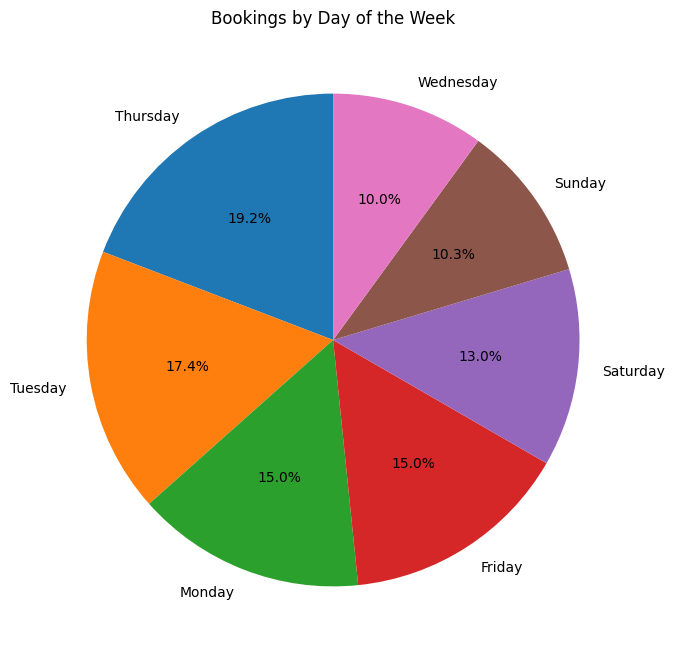

In [ ]:
import matplotlib.pyplot as plt

# Convert booking_time to datetime and extract day of the week
bookings_df['booking_time'] = pd.to_datetime(bookings_df['booking_time'])
bookings_df['day_of_week'] = bookings_df['booking_time'].dt.day_name()

# Count bookings by day of the week
bookings_by_day = bookings_df['day_of_week'].value_counts()

# Plot pie chart
bookings_by_day.plot.pie(autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Bookings by Day of the Week')
plt.ylabel('')
plt.show()


For each service, display the total number of bookings and the total Gross Booking Value in INR.

In [ ]:
# Group by service_name and aggregate total bookings and gross booking value
service_summary = bookings_df.groupby('service_name').agg(
    total_bookings=('booking_id', 'count'),
    total_gross_booking_value=('INR_Amount', 'sum')
).reset_index()

print(service_summary)


  service_name  total_bookings  total_gross_booking_value
0      GOIBIBO             186                 5897637.97
1          MMT              48                  665669.08
2        YATRA             105                 3378702.13


For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

In [ ]:
# Filter customers with more than 1 booking
customers_with_multiple_bookings = bookings_df.groupby('customer_id').filter(lambda x: x['booking_id'].nunique() > 1)

# Group by from_city and to_city to find the most booked route
most_booked_route = customers_with_multiple_bookings.groupby(['from_city', 'to_city']).size().idxmax()

print(f'Most booked route: {most_booked_route}')


Most booked route: ('Gurgaon', 'Roissy-en-France')


Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been at least 5 departures from that city?

In [ ]:
# Group by from_city and filter cities with at least 5 departures
departure_city_summary = bookings_df.groupby('from_city').filter(lambda x: x['booking_id'].nunique() >= 5)

# Calculate average days to departure
departure_city_avg_days = departure_city_summary.groupby('from_city')['days_to_departure'].mean().nlargest(3)

print(departure_city_avg_days)


from_city
Bālāpur       46.166667
Devanhalli    29.583333
Chennai       26.187500
Name: days_to_departure, dtype: float64


Plot a heatmap displaying correlations of the numerical columns.

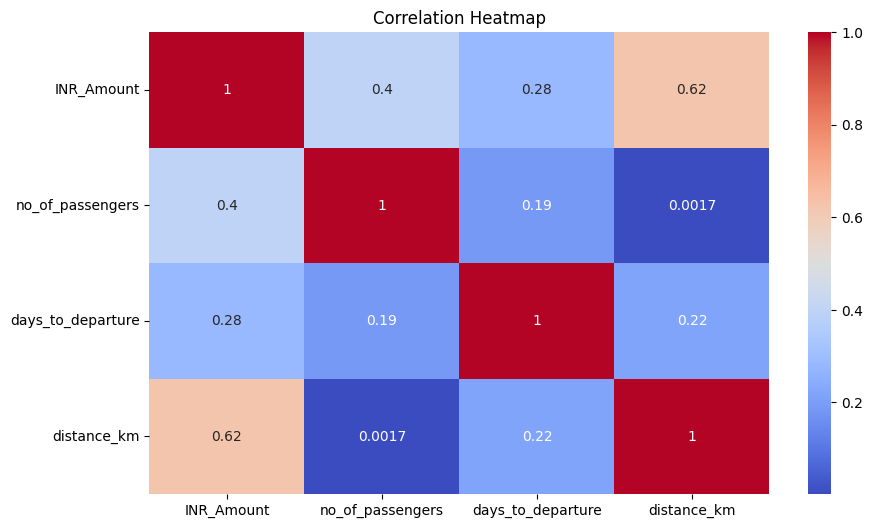

In [ ]:
import seaborn as sns

# Correlation heatmap of numerical columns
numerical_cols = ['INR_Amount', 'no_of_passengers', 'days_to_departure', 'distance_km']
corr_matrix = bookings_df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


For each service, which is the most used device type for making bookings on the platform?

In [ ]:
# Group by service_name and device_type_used
most_used_device_by_service = bookings_df.groupby(['service_name', 'device_type_used']).size().groupby(level=0).idxmax()

print(most_used_device_by_service)


service_name
GOIBIBO      (GOIBIBO, IOS)
MMT          (MMT, Desktop)
YATRA      (YATRA, Desktop)
dtype: object


Plot trends at a quarterly frequency for the number of bookings by each device type.

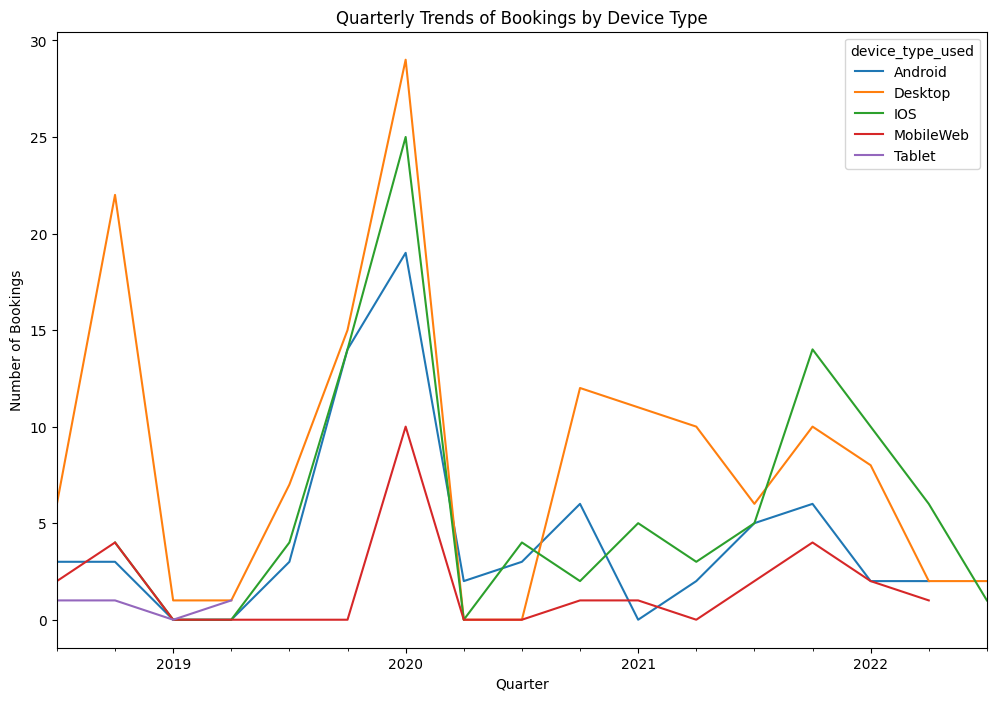

In [ ]:
# Convert booking_time to datetime and set as index
bookings_df.set_index('booking_time', inplace=True)

# Resample by quarter and device type
quarterly_device_trends = bookings_df.groupby('device_type_used').resample('Q').size().unstack(level=0)

# Plot time series for each device type
quarterly_device_trends.plot(figsize=(12, 8))
plt.title('Quarterly Trends of Bookings by Device Type')
plt.xlabel('Quarter')
plt.ylabel('Number of Bookings')
plt.show()


Calculate the overall Booking to Search Ratio (oBSR) and answer related sub-questions.

In [ ]:
# Calculate oBSR for each session
merged_sessions_bookings = pd.merge(sessions_df, bookings_df, on='booking_id', how='left')
obsr = merged_sessions_bookings.groupby('session_id').apply(lambda x: x['booking_id'].nunique() / x['search_id'].nunique())

# Calculate average oBSR by month and day of the week
obsr_by_month = obsr.resample('M').mean()
obsr_by_day = obsr.groupby(obsr.index.dayofweek).mean()

# Plot oBSR time series
obsr.plot(figsize=(10, 6))
plt.title('Time Series of oBSR')
plt.xlabel('Date')
plt.ylabel('oBSR')
plt.show()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'